###***WEEK 7***

###***1. Apply SVM on IRIS data set from sklearn for classification.***

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can choose different kernels here
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



###***2. Visualize data classification with different kernels as explained in the Google Colab shared on the theory classroom.***

In [2]:
import sklearn.datasets as skd
import sklearn.pipeline as skp
from sklearn.preprocessing import StandardScaler
import sklearn.svm as sksvm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go

flower = skd.load_iris(as_frame = True)

flower.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0.8053132163466953
0.8053132163466953
Intercept : [3.27999997]
Coefficient : [[-1.1 -0.7]]


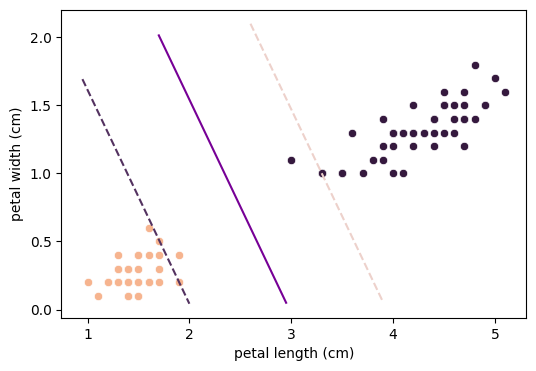

In [3]:
svm_pipeline = skp.make_pipeline(StandardScaler(),sksvm.LinearSVC(C=1,random_state = 42))

svm_model = sksvm.SVC(kernel = 'linear')
svm_model.fit(flower.data[['petal length (cm)','petal width (cm)']].values , flower.target == 0)

x = np.array([1.7,2.95])
m = - svm_model.coef_[0][0] /svm_model.coef_[0][1]
b = - svm_model.intercept_[0] / svm_model.coef_[0][1]
y =   m * x + b

dist = ((svm_model.coef_[0][0]*flower.data['petal length (cm)'] + svm_model.coef_[0][1]*flower.data['petal width (cm)'] + svm_model.intercept_[0])/(math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2 ))).abs()
shrt = float(dist.sort_values().iloc[2])
shrt2 = float(dist.sort_values().iloc[2])

print(shrt)
print(shrt2)

b1 = b + shrt2 * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]
b2 = b - shrt * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]

x2 = np.array([0.95,2])
x3= np.array([2.6,3.9])

y1 =   m * x2 + b1
y2 =   m * x3 + b2

print(f"Intercept : {svm_model.intercept_}")
print(f"Coefficient : {svm_model.coef_}")

plt.figure(figsize = (6,4))
sns.set_palette("rocket")
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 1])
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 0],color=sns.color_palette("rocket")[5])
plt.plot(x,y,color = '#770096')
plt.plot(x2,y1,color = '#533260',linestyle = 'dashed')
plt.plot(x3,y2,color = '#edd1cb',linestyle = 'dashed')
plt.show()

0.03140412232845589
0.038167187476665795
Intercept : [-14.41486828]
Coefficient : [[2.1829247  2.25365588]]


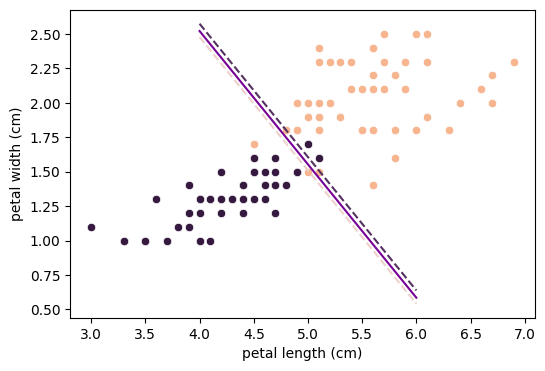

In [4]:

svm_pipeline = skp.make_pipeline(StandardScaler(),sksvm.LinearSVC(C=1,random_state = 42))

svm_model = sksvm.SVC(kernel = 'linear')
svm_model.fit(flower.data[['petal length (cm)','petal width (cm)']].values , flower.target == 2)

x = np.array([4,6])
m = - svm_model.coef_[0][0] /svm_model.coef_[0][1]
b = - svm_model.intercept_[0] / svm_model.coef_[0][1]
y =   m * x + b

dist = ((svm_model.coef_[0][0]*flower.data['petal length (cm)'] + svm_model.coef_[0][1]*flower.data['petal width (cm)'] + svm_model.intercept_[0])/(math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2 ))).abs()
shrt = float(dist.sort_values().iloc[0])
shrt2 = float(dist.sort_values().iloc[1])

print(shrt)
print(shrt2)

b1 = b + shrt2 * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]
b2 = b - shrt * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]

x2 = np.array([4,6])
x3= np.array([4,6])

y1 =   m * x2 + b1
y2 =   m * x3 + b2

print(f"Intercept : {svm_model.intercept_}")
print(f"Coefficient : {svm_model.coef_}")

plt.figure(figsize = (6,4))
sns.set_palette("rocket")
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 1])
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 2],color=sns.color_palette("rocket")[5])
plt.plot(x,y,color = '#770096')
plt.plot(x2,y1,color = '#533260',linestyle = 'dashed')
plt.plot(x3,y2,color = '#edd1cb',linestyle = 'dashed')
plt.show()

[ 0.          2.27272727  4.54545455  6.81818182  9.09090909 11.36363636
 13.63636364 15.90909091 18.18181818 20.45454545 22.72727273 25.
 27.27272727 29.54545455 31.81818182 34.09090909 36.36363636 38.63636364
 40.90909091 43.18181818 45.45454545 47.72727273 50.        ]


<Figure size 600x600 with 0 Axes>

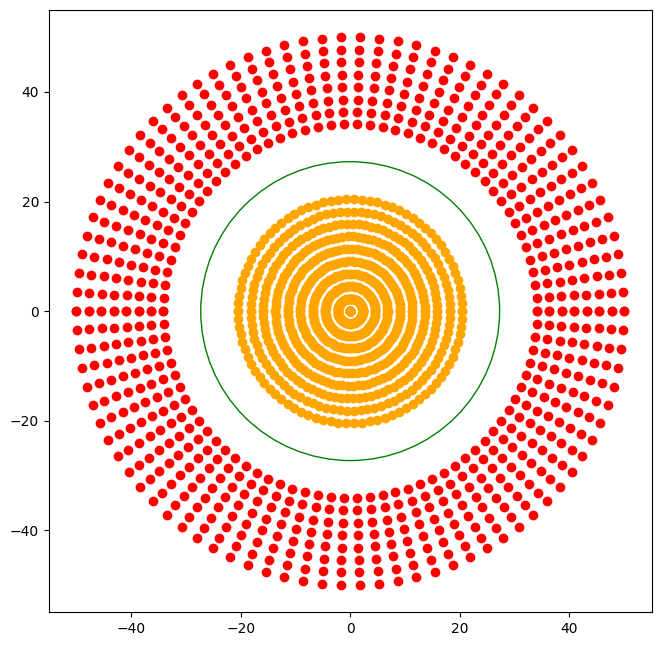

In [5]:
a = np.linspace(0,50,23)
print(a)
plt.rcParams["figure.figsize"] = [6.7, 6.7]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize = (6,6))
figure = plt.figure()
axes = figure.add_subplot()
X = np.array([])
Y = np.array([])
X2 = np.array([])
Y2 = np.array([])
for i in range(0,23):
  x = []
  y= []
  for j in range(23):
    if i <= 9 or i >= 15:
      y.append(a[i]*math.sin(4*j/180*3.1415))
      y.append(-a[i]*math.sin(4*j/180*3.1415))
      y.append(a[i]*math.sin(4*j/180*3.1415))
      y.append(-a[i]*math.sin(4*j/180*3.1415))
      x.append(a[i]*math.cos(4*j/180*3.1415))
      x.append(a[i]*math.cos(4*j/180*3.1415))
      x.append(-a[i]*math.cos(4*j/180*3.1415))
      x.append(-a[i]*math.cos(4*j/180*3.1415))
      if i <= 9:
        X = np.append(X,x)
        Y = np.append(Y,y)
      else:
        X2 = np.append(X2,x)
        Y2 = np.append(Y2,y)
  if i <= 9:
    plt.scatter(x,y, color = "orange")
  if i >= 15:
    plt.scatter(x,y, color = "r")
cir = plt.Circle( (0, 0), radius = 27.272727 , fill = False , color = 'g')
axes.set_aspect(1)
axes.add_artist(cir)
plt.show()

In [6]:
Z = np.sqrt(X**2+Y**2)
Z2 = np.sqrt(X2**2+Y2**2)
df = px.data.iris()
s1 = pd.Series(X)
s2 = pd.Series(Y)
s3 = pd.Series(Z)
s4 = pd.Series(np.full(X.shape,'Low'))
frame = {'X': s1,
         'Y': s2,
         '(X^2+Y^2)^0.5': s3,
         'Type' : s4}
df1 = pd.DataFrame(frame)
s12 = pd.Series(X2)
s22 = pd.Series(Y2)
s32 = pd.Series(Z2)
s42 = pd.Series(np.full(X.shape,'High'))
frame2 = {'X': s12,
         'Y': s22,
         '(X^2+Y^2)^0.5': s32,
         'Type' : s42}
df2 = pd.DataFrame(frame2)
df3 = pd.concat([df1,df2])
fig = px.scatter_3d(df3, x='X', y='Y', z='(X^2+Y^2)^0.5',color = 'Type',color_discrete_sequence=[
                 "orange", "red"], width=1200, height=1000)
x= np.linspace(-50, 50, 100)
y= np.linspace(-50, 50, 100)
z= 27.2727*np.ones((100,100))
mycolorscale = [[0, '#533260'],
                [1, '#533260']]

surf = go.Surface(x=x, y=y, z=z, colorscale=mycolorscale, showscale=False, opacity=0.5)
fig.add_trace(surf)
fig.show()

In [7]:
Z = np.sqrt(X*Y)
Z2 = np.sqrt(X2*Y2)
df = px.data.iris()
s1 = pd.Series(X)
s2 = pd.Series(Y)
s3 = pd.Series(Z)
s4 = pd.Series(np.full(X.shape,'Low'))
frame = {'X': s1,
         'Y': s2,
         'XY': s3,
         'Type' : s4}
df1 = pd.DataFrame(frame)
s12 = pd.Series(X2)
s22 = pd.Series(Y2)
s32 = pd.Series(Z2)
s42 = pd.Series(np.full(X.shape,'High'))
frame2 = {'X': s12,
         'Y': s22,
         'XY': s32,
         'Type' : s42}
df2 = pd.DataFrame(frame2)
df3 = pd.concat([df1,df2])
fig = px.scatter_3d(df3, x='X', y='Y', z='XY',color = 'Type',color_discrete_sequence=[
                 "orange", "red"], width=1200, height=1000)
x= np.linspace(-50, 50, 100)
y= np.linspace(-50, 50, 100)
z= 27.2727*np.ones((100,100))
mycolorscale = [[0, '#533260'],
                [1, '#533260']]

#surf = go.Surface(x=x, y=y, z=z, colorscale=mycolorscale, showscale=False, opacity=0.5)
#fig.add_trace(surf)

fig.show()

<ipython-input-7-624bba39208d>:1: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-7-624bba39208d>:2: RuntimeWarning:

invalid value encountered in sqrt



In [8]:
Z = np.sqrt(X*Y)
Z2 = np.sqrt(X2*Y2)
df = px.data.iris()
s1 = pd.Series(X**2)
s2 = pd.Series(Y**2)
s3 = pd.Series(Z)
s4 = pd.Series(np.full(X.shape,'Low'))
frame = {'X^2': s1,
         'Y^2': s2,
         'XY': s3,
         'Type' : s4}
df1 = pd.DataFrame(frame)
s12 = pd.Series(X2**2)
s22 = pd.Series(Y2**2)
s32 = pd.Series(Z2)
s42 = pd.Series(np.full(X.shape,'High'))
frame2 = {'X^2': s12,
         'Y^2': s22,
         'XY': s32,
         'Type' : s42}
df2 = pd.DataFrame(frame2)
df3 = pd.concat([df1,df2])
fig = px.scatter_3d(df3, x='X^2', y='Y^2', z='XY',color = 'Type',color_discrete_sequence=[
                 "orange", "red"], width=1200, height=1000)
x= np.linspace(-50, 50, 100)
y= np.linspace(-50, 50, 100)
z= 27.2727*np.ones((100,100))
mycolorscale = [[0, '#533260'],
                [1, '#533260']]

#surf = go.Surface(x=x, y=y, z=z, colorscale=mycolorscale, showscale=False, opacity=0.5)
#fig.add_trace(surf)
fig.show()

<ipython-input-8-e45cbcae1b3e>:1: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-8-e45cbcae1b3e>:2: RuntimeWarning:

invalid value encountered in sqrt



In [9]:
df_new = pd.DataFrame({"sepal length (cm)":[5],
                       "sepal width (cm)":[3.6],
                    "petal length (cm)":[2.9],
                    "petal width (cm)":[0.9]})
flower.data = pd.concat([flower.data,df_new])


In [10]:
flower.target = flower.target.append(pd.Series([0]),ignore_index = True)
flower.target

<ipython-input-10-70bf03752976>:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



0      0
1      0
2      0
3      0
4      0
      ..
146    2
147    2
148    2
149    2
150    0
Length: 151, dtype: int64

0.3187215569874418
0.3187215569874418
Intercept : [-14.41486828]
Coefficient : [[2.1829247  2.25365588]]


<ipython-input-11-dbaf7d4c1008>:38: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-11-dbaf7d4c1008>:39: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



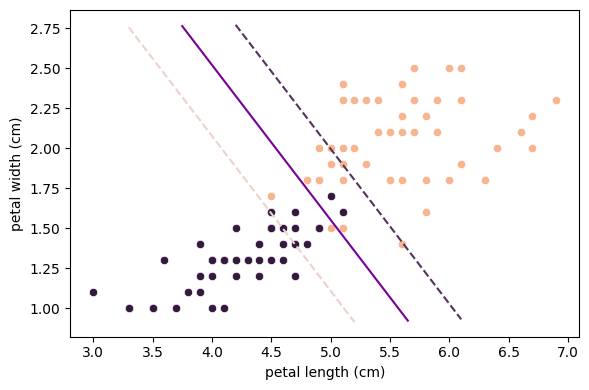

In [11]:

svm_pipeline = skp.make_pipeline(StandardScaler(),sksvm.LinearSVC(C=1,random_state = 42))

svm_model = sksvm.SVC(kernel = 'linear',C=1)
svm_model.fit(flower.data[['petal length (cm)','petal width (cm)']].values , flower.target == 2)

x = np.array([3.75,5.65])
m = - svm_model.coef_[0][0] /svm_model.coef_[0][1]
b = - svm_model.intercept_[0] / svm_model.coef_[0][1]
y =   m * x + b

dist = ((svm_model.coef_[0][0]*flower.data['petal length (cm)'] + svm_model.coef_[0][1]*flower.data['petal width (cm)'] + svm_model.intercept_[0])/(math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2 ))).abs()
shrt = float(dist.sort_values().iloc[2])
shrt2 = float(dist.sort_values().iloc[3])

shrt = 1/math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)
shrt2 = shrt

print(shrt)
print(shrt2)

b1 = b + shrt2 * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]
b2 = b - shrt * math.sqrt(svm_model.coef_[0][0]**2 + svm_model.coef_[0][1]**2)/svm_model.coef_[0][1]

x2 = np.array([4.2,6.1])
x3= np.array([3.3,5.2])
x4 = np.array([4,6])

y1 =   m * x2 + b1
y2 =   m * x3 + b2

y4 = - 1.15000022 / 0.65000009 * x + 3.44500063/0.65000009

print(f"Intercept : {svm_model.intercept_}")
print(f"Coefficient : {svm_model.coef_}")

plt.figure(figsize = (6,4))
sns.set_palette("rocket")
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 1])
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = flower.data[flower.target == 2],color=sns.color_palette("rocket")[5])
plt.plot(x,y,color = '#770096')
plt.plot(x2,y1,color = '#533260',linestyle = 'dashed')
plt.plot(x3,y2,color = '#edd1cb',linestyle = 'dashed')
#plt.plot(x4,y4,color = 'black',linestyle = 'dotted')
plt.show()

In [12]:
for i in range(150):
  if (flower.target[i]  == 1):
    flower.data['petal length (cm)'][i] = flower.data['petal length (cm)'][i] - 1

In [13]:
flower.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [14]:
df_new = pd.DataFrame({"sepal length (cm)":[5,5.2, 4.95 ,5 , 5.2, 5, 4.95, 5.9, 6.1, 4.95, 5.9, 6.1, 5.85, 5.8, 5.7],
                       "sepal width (cm)":[3.6, 3.4, 3.7, 3.6, 3.4, 3.7, 3.6, 3.4, 3, 2.8, 3.4, 3, 2.8, 2.9, 3],
                    "petal length (cm)":[2,2.05,2,1.8,2.1,1.85,2.1,2.2,2.2,2.7,2.15,2.25,2.6,2.4,2.7],
                    "petal width (cm)":[0.9,1,0.75,0.6,0.3,0.8,1.05,0.9,0.7,0.6,1.1,1.05,1.125,0.8,0.9]})
flower.data = pd.concat([flower.data,df_new])

In [15]:
flower.target = flower.target.append(pd.Series([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]))
flower.target

<ipython-input-15-d1a8025dc52b>:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



0     0
1     0
2     0
3     0
4     0
     ..
10    1
11    1
12    1
13    1
14    1
Length: 166, dtype: int64

###***Explain the different types of kernels, and also explain the process to choose the appropriate kernel for a dataset classification***


## **TYPES OF KERNEL**

**Linear Kernel:**

The linear kernel is the simplest form of kernel and represents data in the original feature space.
It assumes that the data is linearly separable, meaning the classes can be separated by a straight line.
The decision boundary in the feature space is a hyperplane.


**Polynomial Kernel:**

The polynomial kernel maps the data into a higher-dimensional space using polynomial functions.
It is capable of capturing non-linear relationships in the data.
The decision boundary becomes a polynomial function in the higher-dimensional space.
It has parameters like degree and coefficient that need to be tuned for optimal performance.


**Radial Basis Function (RBF) Kernel:**

The RBF kernel maps the data into an infinite-dimensional space.
It is highly flexible and able to capture complex relationships in the data.
The decision boundary becomes non-linear and more adaptive to the data distribution.
It has a parameter called gamma that determines the spread of the kernel.

## **PROCESS TO CHOOSE THE APPROPRIATE KERNEL FOR A DATASET CLASSIFICATION**

**Understand Data Complexity:**
Analyze the dataset to determine if the relationship between features and classes is linear or non-linear.
Visualize the data distribution and decision boundaries using techniques like scatter plots and dimensionality reduction.

**Experiment with Kernels:**
Try different kernel functions like linear, polynomial, and RBF.
Train multiple SVM models with different kernels and compare their performance using validation techniques like cross-validation.

**Evaluate Performance:**
Assess the performance of each SVM model using metrics like accuracy, precision, recall, and F1-score.
Choose the kernel that provides the best performance on validation data.

**Consider Computational Resources:**
Linear kernels are computationally less expensive compared to non-linear kernels like polynomial and RBF.
If computational resources are limited, prefer linear kernels.

**Tune Hyperparameters:**
Adjust kernel-specific parameters like degree for polynomial kernel and gamma for RBF kernel to optimize model performance.
Use techniques like grid search or random search for hyperparameter tuning.

**Domain Knowledge:**
Consider domain-specific knowledge and intuition to select a kernel that aligns with the underlying data distribution and problem requirements.
For example, if prior knowledge suggests a non-linear relationship between features and classes, prefer non-linear kernels like polynomial or RBF.
